# 用户流失分析与预测

## 数据预处理
### 导入数据

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
%matplotlib inline 

In [68]:
data=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
#设置显示所有的列
pd.set_option('display.max_columns',None)
#设置显示所有的行
# pd.set_option('display.max_rows',None)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

可以看出，数据共有7043条记录，21个字段，数据类型主要包含object字符串、int64数值类型、float64浮点类型。其中TotalCharges数据类型是字符串，应该转化成浮点类型。

### 数据转换

In [5]:
data.columns=['用户ID','性别','老年人' ,'是否有配偶' ,'是否经济独立' ,'客户的入网时间','是否开通电话服务业务' ,'是否开通了多线业务'
,'是否开通互联网服务' ,'是否开通网络安全服务','是否开通在线备份业务','是否开通了设备保护业务','是否开通了技术支持服务','是否开通网络电视'
,'是否开通网络电影','签订合同年限' ,'是否开通电子账单','付款方式','月费用','总费用','该用户是否流失']
data.head()

,用户ID,性别,老年人,是否有配偶,是否经济独立,客户的入网时间,是否开通电话服务业务,是否开通了多线业务,是否开通互联网服务,是否开通网络安全服务,是否开通在线备份业务,是否开通了设备保护业务,是否开通了技术支持服务,是否开通网络电视,是否开通网络电影,签订合同年限,是否开通电子账单,付款方式,月费用,总费用,该用户是否流失
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


将总费用转化成浮点类型，出现错误：ValueError: could not convert string to float:字符串无法转化成浮点类型

In [6]:
data['总费用'].astype(float)
#运行结果：
could not convert string to float:

SyntaxError: invalid syntax (<ipython-input-6-323b9874fde4>, line 3)

再次检查数据，发现有缺失值。

In [7]:
data['总费用'].value_counts()

20.2       11
           11
19.75       9
20.05       8
19.9        8
19.65       8
45.3        7
19.55       7
19.45       6
20.15       6
20.25       6
20.3        5
20.45       5
69.65       4
69.9        4
20.35       4
75.3        4
19.5        4
50.15       4
44.4        4
44          4
69.6        4
20.5        4
70.6        4
74.7        4
19.3        4
20.4        4
19.85       4
49.9        4
19.2        4
           ..
1267.95     1
6586.85     1
7578.05     1
1195.75     1
35.85       1
116.6       1
6144.55     1
6223.3      1
249.4       1
6185.15     1
1319.95     1
2384.15     1
174.65      1
2688.85     1
74          1
5656.75     1
608.8       1
1326.25     1
1054.75     1
4746.05     1
1620.45     1
6365.35     1
4920.8      1
6891.45     1
6042.7      1
4233.95     1
28.3        1
2111.45     1
1465.75     1
1120.95     1
Name: 总费用, Length: 6531, dtype: int64

依次检查其他列有无缺失值。

In [8]:
for i in data.columns:
    test=data[i].value_counts()
    print('[{0}行数是：{1}'.format(i,test.sum()))
    print('[{0}内容是：\n{1}\n'.format(i,test))

[用户ID行数是：7043
[用户ID内容是：
8631-WUXGY    1
5003-XZWWO    1
2096-XOTMO    1
7128-GGCNO    1
3927-NLNRY    1
4683-WYDOU    1
5360-XGYAZ    1
1956-YIFGE    1
8410-BGQXN    1
8749-CLJXC    1
7663-YJHSN    1
4801-JZAZL    1
6173-GOLSU    1
1474-JUWSM    1
9867-JCZSP    1
6128-AQBMT    1
7337-CINUD    1
7928-VJYAB    1
2874-YXVVA    1
5287-QWLKY    1
0665-XHDJU    1
9658-WYUFB    1
5924-IFQTT    1
9052-VKDUW    1
1539-LNKHM    1
9297-FVVDH    1
1269-FOYWN    1
0239-OXEXL    1
4980-URKXC    1
8473-VUVJN    1
             ..
5213-TWWJU    1
0013-EXCHZ    1
2947-DOMLJ    1
4751-ERMAN    1
6745-JEFZB    1
0323-XWWTN    1
8040-MNRTF    1
9133-AYJZG    1
3672-YITQD    1
7878-RTCZG    1
3871-IKPYH    1
6917-FIJHC    1
7156-MHUGY    1
5846-NEQVZ    1
5791-KAJFD    1
3721-WKIIL    1
9968-FFVVH    1
5480-XTFFL    1
9489-JMTTN    1
8619-IJNDK    1
1297-VQDRP    1
4806-KEXQR    1
7277-OZCGZ    1
2672-DZUOY    1
9888-ZCUMM    1
6461-SZMCV    1
6145-NNPNO    1
6598-RFFVI    1
7392-YYPYJ    1
3308-JSGML    1


将总费用强制转化成浮点类型。

In [9]:
data['总费用']=data['总费用'].apply(pd.to_numeric, errors="coerce")
data[data['总费用'].isnull()][['客户的入网时间','总费用']]

,客户的入网时间,总费用
488,0,NaN
753,0,NaN
936,0,NaN
1082,0,NaN
1340,0,NaN
3331,0,NaN
3826,0,NaN
4380,0,NaN
5218,0,NaN
6670,0,NaN


转化为浮点类型后，发现缺失值的用户入网时间都为0，推测用户入网的第一个月，还没有总费用。因此将总费用填充为月费用，用户的入网时间改成1。

In [10]:
data['总费用'].fillna(data[data['总费用'].isnull()]['月费用'],axis=0,inplace=True)
data['客户的入网时间'].replace(to_replace=0,value=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
用户ID           7043 non-null object
性别             7043 non-null object
老年人            7043 non-null int64
是否有配偶          7043 non-null object
是否经济独立         7043 non-null object
客户的入网时间        7043 non-null int64
是否开通电话服务业务     7043 non-null object
是否开通了多线业务      7043 non-null object
是否开通互联网服务      7043 non-null object
是否开通网络安全服务     7043 non-null object
是否开通在线备份业务     7043 non-null object
是否开通了设备保护业务    7043 non-null object
是否开通了技术支持服务    7043 non-null object
是否开通网络电视       7043 non-null object
是否开通网络电影       7043 non-null object
签订合同年限         7043 non-null object
是否开通电子账单       7043 non-null object
付款方式           7043 non-null object
月费用            7043 non-null float64
总费用            7043 non-null float64
该用户是否流失        7043 non-null object
dtypes: float64(2), int64(2), object(17)
memory usage: 1.1+ MB


数据处理完毕。

## 用户流失分析
### 流失占比分析

查看用户流失情况。

Text(0.5, 1.0, '用户流失占比')

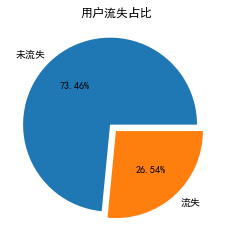

In [11]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.pie(data['该用户是否流失'].value_counts(),labels=['未流失','流失'],autopct='%.2f%%',explode=(0.1,0))
plt.title('用户流失占比')

可以看出，大概有1/3的用户流失。

### 用户属性分析

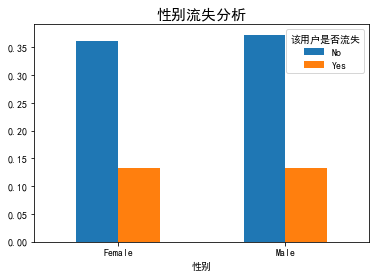

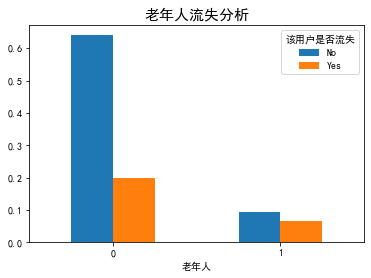

In [12]:
def plt_bar(featrue):
    df=(data.groupby(data[featrue])['该用户是否流失'].value_counts()/len(data)).unstack()
    df.plot(kind='bar')
    plt.title('{}流失分析'.format(featrue),fontsize=15)
    plt.xticks(rotation=0)
    plt.rcParams.update({'font.size': 10})
plt_bar('性别')
plt_bar('老年人')

小结：

- 用户流失基本与性别无关。
- 年老用户的流失占比显著高于年轻用户。

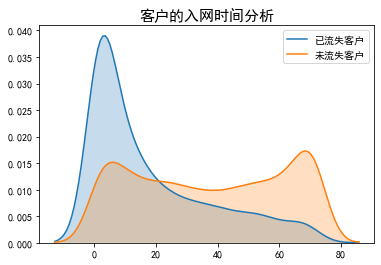

In [15]:
def plt_kde(feature):
    x=data[data['该用户是否流失']=='Yes'][feature]
    y=data[data['该用户是否流失']=='No'][feature]
    sns.kdeplot(x,shade=True,label='已流失客户')
    sns.kdeplot(y,shade=True,label='未流失客户')
    plt.title('{}分析'.format(feature),fontsize=15)
plt_kde('客户的入网时间')

小结：

- 用户的入网时间越短，流失越高，符合一般规律。
- 用户入网时间在0-20天内流失风险最大。
- 入网时间达到三个月，流失率小于在网率，证明用户心理的稳定期一般是3个月。

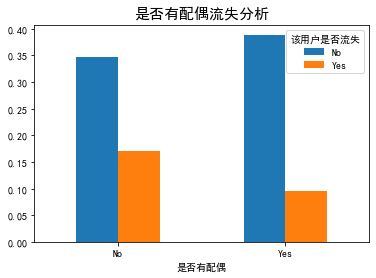

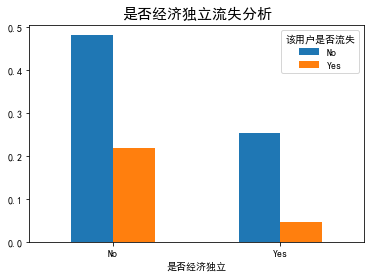

In [16]:
plt_bar('是否有配偶')
plt_bar('是否经济独立')

小结：

- 没有配偶的用户流失率高于有配偶。
- 经济未独立的用户流失率高于经济独立。

### 服务属性分析

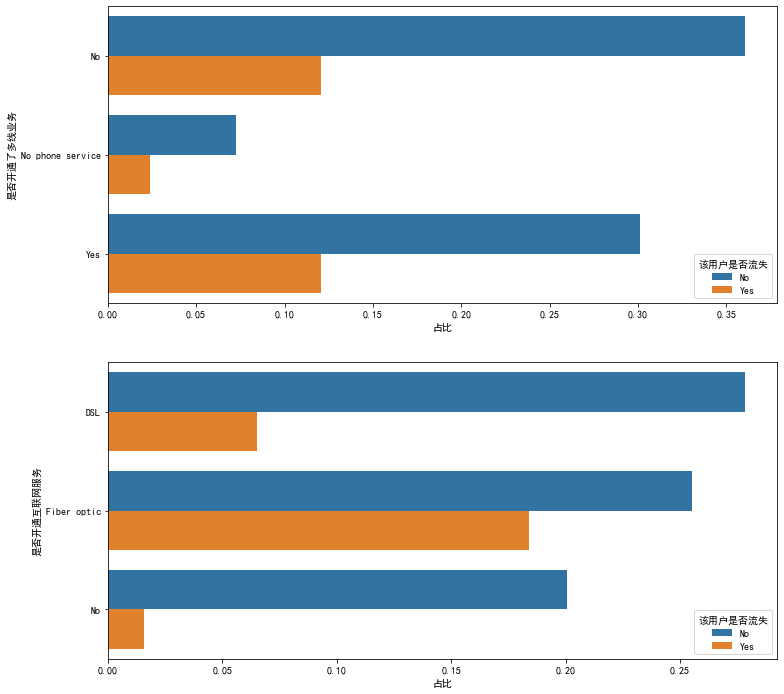

In [17]:
def plt_hbar(feature1,feature2):
    figure,ax=plt.subplots(2,1,figsize=(12,12))
    gp_dep=(data.groupby(feature1)['该用户是否流失'].value_counts()/len(data)).to_frame()
    gp_dep.rename(columns={"该用户是否流失":'占比'} , inplace=True)
    gp_dep.reset_index(inplace=True)
    sns.barplot(x='占比', hue='该用户是否流失',y=feature1, data=gp_dep,ax=ax[0])
    
    gp=(data.groupby(feature2)['该用户是否流失'].value_counts()/len(data)).to_frame()
    gp.rename(columns={"该用户是否流失":'占比'} , inplace=True)
    gp.reset_index(inplace=True)
    sns.barplot(x='占比', hue='该用户是否流失',y=feature2, data=gp,ax=ax[1])
plt_hbar("是否开通了多线业务","是否开通互联网服务")

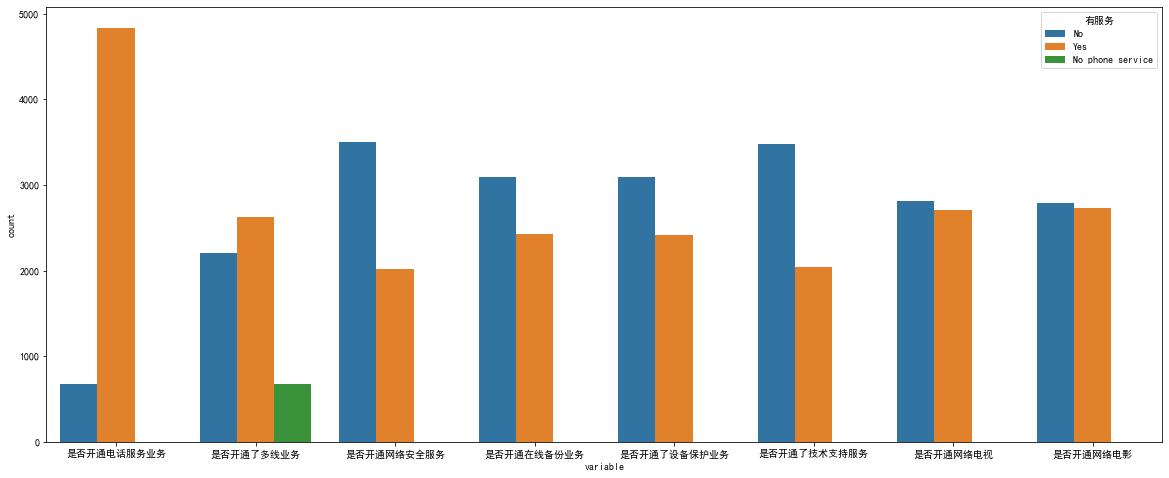

In [18]:
df1=pd.melt(data[data['是否开通互联网服务']!='No'][['是否开通电话服务业务','是否开通了多线业务','是否开通网络安全服务'
 ,'是否开通在线备份业务','是否开通了设备保护业务','是否开通了技术支持服务'
,'是否开通网络电视','是否开通网络电影']],value_name='有服务')
plt.figure(figsize=(20, 8))
sns.countplot(data=df1,x='variable',hue='有服务')

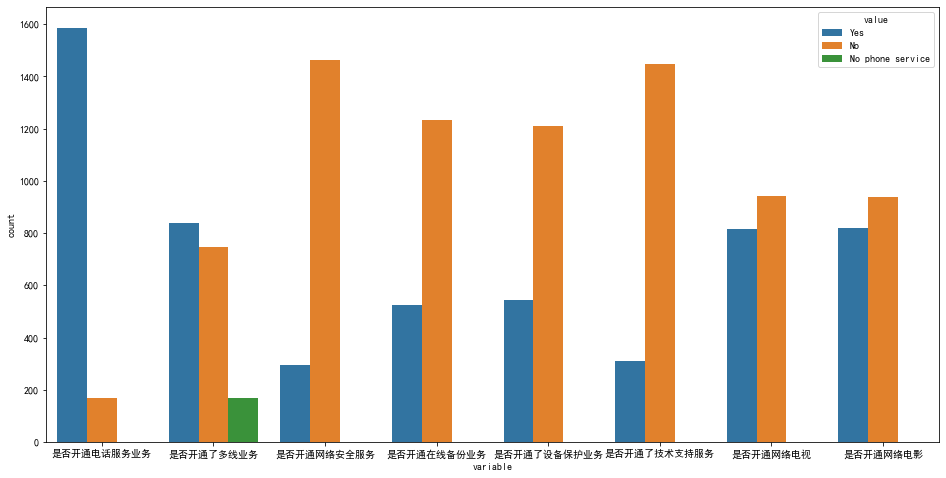

In [19]:
df2=pd.melt(data[(data['是否开通互联网服务']!='No')& (data['该用户是否流失']=='Yes')][['是否开通电话服务业务','是否开通了多线业务','是否开通网络安全服务'
 ,'是否开通在线备份业务','是否开通了设备保护业务','是否开通了技术支持服务'
,'是否开通网络电视','是否开通网络电影']])
figure,ax=plt.subplots(figsize=(16,8))
sns.countplot(x='variable',hue='value',data=df2)

小结：

- 电话服务对整体的流失影响较小。
- 单光纤用户的流失占比较高。
- 光纤用户绑定了安全、备份、保护、技术支持服务的流失率较低
- 光纤用户附加网络电视、电影服务的流失率占比较高。

### 合同属性分析

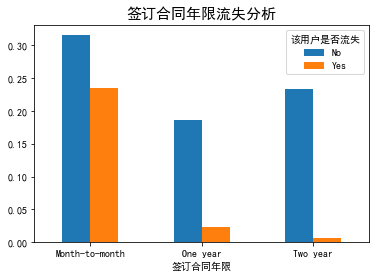

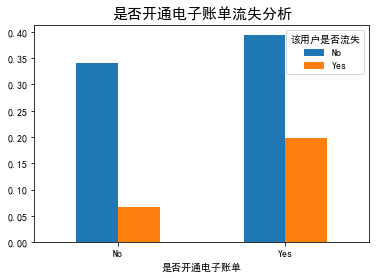

In [20]:
plt_bar('签订合同年限')
plt_bar('是否开通电子账单')

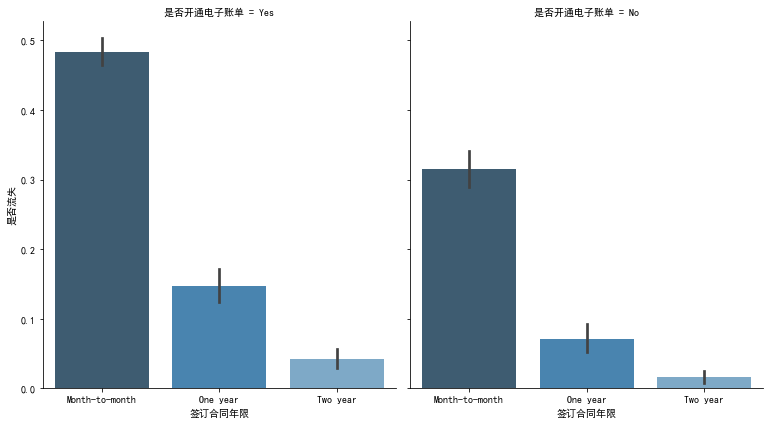

In [21]:
data['是否流失']=data['该用户是否流失'].replace('No',0).replace('Yes',1)
g = sns.FacetGrid(data, col="是否开通电子账单", height=6, aspect=.9)
ax = g.map(sns.barplot, "签订合同年限","是否流失",palette = "Blues_d"
           , order= ['Month-to-month', 'One year', 'Two year'])

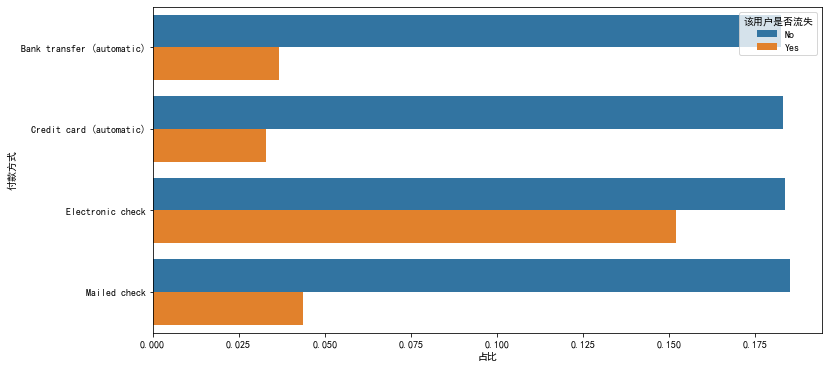

In [22]:
figure,ax=plt.subplots(figsize=(12,6))
gp_dep=(data.groupby('付款方式')['该用户是否流失'].value_counts()/len(data)).to_frame()
gp_dep.rename(columns={"该用户是否流失":'占比'} , inplace=True)
gp_dep.reset_index(inplace=True)
sns.barplot(x='占比', hue='该用户是否流失',y='付款方式', data=gp_dep)

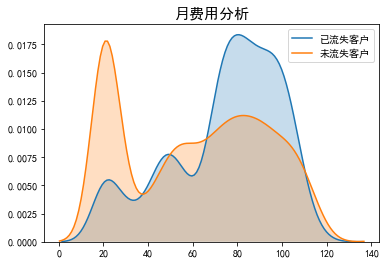

In [25]:
plt_kde('月费用')

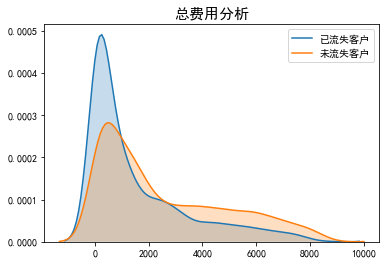

In [26]:
plt_kde('总费用')

- 签订合同年限的用户流失率：按月签订>按一年签订>按两年签订，证明长期合同能保留用户。
- 开通电子账单的用户流失率较高，原因是采用电子支票的用户按月签订合同的占比较高，用户黏性低，易流失。
- 采用电子支票的用户流失率最高，推测是该方式的使用体验一般。
- 月消费金额大约在70-110用户流失率较高。
- 长期来看，用户总消费越高，流失率越低，符合一般经验。

通过以上分析，可以得到较高流失率的人群特征，具有这些特征的人群需要对其经营，增加用户黏性，延长生命周期价值。



## 用户流失预测
### 数据预处理

用户ID列没用，将其删除。

In [29]:
data.drop('用户ID',inplace=True,axis=1)

将特征“是否开通了多线业务”中的值No phone service替换成No，
其他特征也做相同的处理。

In [31]:
data['是否开通了多线业务'].replace('No phone service','No',inplace=True)
col=['是否开通网络安全服务','是否开通在线备份业务','是否开通了设备保护业务',
     '是否开通了技术支持服务','是否开通网络电视','是否开通网络电影']
for i in col:
    data[i].replace('No internet service','No',inplace=True)

观察数据类型，发现除了“客户的入网时间”、“月费用”、“总费用”是连续型特征，其余基本是离散型特征，对于离散型特征，特征之间没有大小关系，采用one-hot编码，特征之间有大小关系，采用数值映射。

In [32]:
clos=data[data.columns[data.dtypes==object]].copy()
for i in clos.columns:
    if clos[i].nunique()==2:
        clos[i]=pd.factorize(clos[i])[0]
    else:
        clos=pd.get_dummies(clos,columns=[i])
clos['老年人']=data['老年人']
clos['月费用']=data['月费用']
clos['总费用']=data['总费用']
clos['客户的入网时间']=data['客户的入网时间']

划分特征和标签。

In [33]:
X=clos.iloc[:,clos.columns!='该用户是否流失']
y=clos.iloc[:,clos.columns=='该用户是否流失'].values.ravel()

样本平衡处理：采用的是过采样SMOTE算法，其主要原理是通过插值的方式插入近邻的数据点。

In [37]:
print('样本个数:{},1占:{:.2%},0占:{:.2%}'.format(X.shape[0],y.sum()/X.shape[0],(X.shape[0]-y.sum())/X.shape[0]))
smote=SMOTE(random_state=10)
over_X,over_y=smote.fit_sample(X,y)
print('样本个数:{},1占:{:.2%},0占:{:.2%}'.format(over_X.shape[0],over_y.sum()/over_X.shape[0],(over_X.shape[0]-over_y.sum())/over_X.shape[0]))

样本个数:7043,1占:26.54%,0占:73.46%
样本个数:10348,1占:50.00%,0占:50.00%


### 模型预测

划分训练集测试集。

In [63]:
Xtrain,Xtest,ytrain,ytest=train_test_split(over_X,over_y,test_size=0.3,random_state=10)

采用决策树、随机森林、K近邻、逻辑回归四个模型。观察模型的准确度、精确度、召回率、f1。

In [64]:
model=[DecisionTreeClassifier(random_state=120)
      , RandomForestClassifier(random_state=120)
      ,KNeighborsClassifier()
      , LogisticRegression(max_iter=1000)]
for clf in model:
    clf.fit(Xtrain,ytrain)
    y_pre=clf.predict(Xtest)
    precision = precision_score(ytest, y_pre) 
    accuracy = accuracy_score(ytest, y_pre)
    
    print(clf,'\n \n',classification_report(ytest,y_pre)
         ,'\n \n Precision Score:', precision
         ,'\n Accuracy Score::',accuracy
          ,'\n\n')

DecisionTreeClassifier(random_state=120) 
 
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      1581
           1       0.80      0.82      0.81      1524

    accuracy                           0.81      3105
   macro avg       0.81      0.81      0.81      3105
weighted avg       0.81      0.81      0.81      3105
 
 
 Precision Score: 0.7992327365728901 
 Accuracy Score:: 0.8106280193236715 


RandomForestClassifier(random_state=120) 
 
               precision    recall  f1-score   support

           0       0.84      0.86      0.85      1581
           1       0.85      0.84      0.84      1524

    accuracy                           0.85      3105
   macro avg       0.85      0.85      0.85      3105
weighted avg       0.85      0.85      0.85      3105
 
 
 Precision Score: 0.8488681757656458 
 Accuracy Score:: 0.8466988727858293 


KNeighborsClassifier() 
 
               precision    recall  f1-score   support

           0

画出模型的学习曲线，观察模型的拟合情况。

F:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "F:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "F:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1376, in fit
    " class: %r" % classes_[0])
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

  FitFailedWarning)


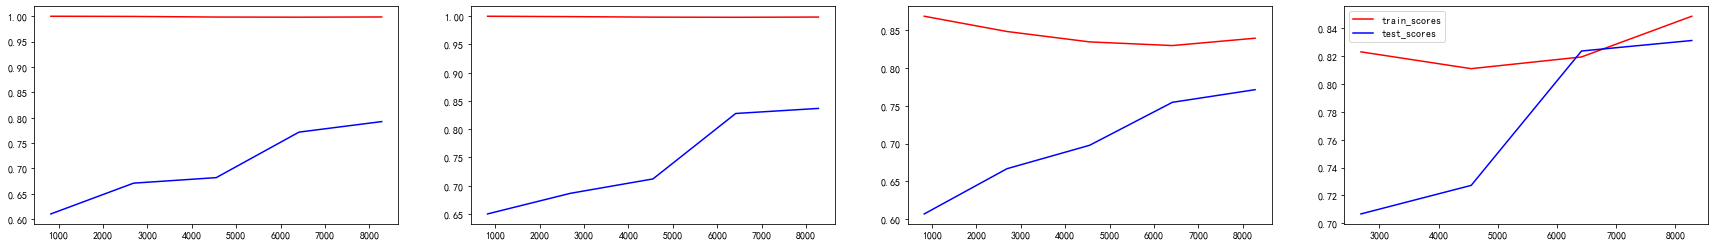

In [65]:
figure,ax=plt.subplots(1,4,figsize=(30,4))
for i in range(4):
    train_sizes, train_scores, valid_scores=learning_curve(model[i],over_X,over_y, cv=5,random_state=10)
    train_std=train_scores.mean(axis=1)
    test_std=valid_scores.mean(axis=1)
    ax[i].plot(train_sizes,train_std,color='red',label='train_scores')
    ax[i].plot(train_sizes,test_std,color='blue',label='test_scores')
plt.legend()

从结果来看，随机森林模型预测的准确度、精度、以及f1分数较高，但是却有严重的过拟合。接下来利用网格搜索调整随机森林的参数，降低过拟合。

In [69]:
param_grid  = { 
                'n_estimators' : [500,1200],
#                'min_samples_split': [2,5,10,15],
#                'min_samples_leaf': [1,2,5,10],
                'max_depth': range(1,10,2),
#                 'max_features' : ('log2', 'sqrt'),
              }
rfc=RandomForestClassifier(random_state=120)
gridsearch = GridSearchCV(estimator =rfc, param_grid=param_grid,cv=5)
gridsearch.fit(Xtrain,ytrain)
print('best_params:',gridsearch.best_params_
      ,'\n \nbest_score: ',gridsearch.best_score_)

best_params: {'max_depth': 9, 'n_estimators': 1200} 
 
best_score:  0.8403972638779269


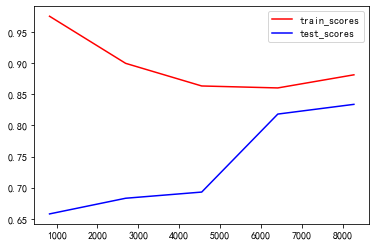

In [70]:
rfc=RandomForestClassifier(random_state=120,max_depth=9, n_estimators= 500)
train_sizes, train_scores, valid_scores=learning_curve(rfc,over_X,over_y, cv=5,random_state=10)
train_std=train_scores.mean(axis=1)
test_std=valid_scores.mean(axis=1)
plt.plot(train_sizes,train_std,color='red',label='train_scores')
plt.plot(train_sizes,test_std,color='blue',label='test_scores')
plt.legend()

经过参数的调整，过拟合的情况已经明显降低了，计算F1的值。

In [73]:
rfc=RandomForestClassifier(random_state=120,max_depth=9, n_estimators= 500)
rfc.fit(Xtrain,ytrain)
y_pre=rfc.predict(Xtest)
f1_score(ytest,y_pre)

0.8468125594671742

### 特征重要性
查看特征的重要性并排序。

In [74]:
fea_import=pd.DataFrame(rfc.feature_importances_)
fea_import['feature']=list(Xtrain)
fea_import.sort_values(0,ascending=False,inplace=True)
fea_import.reset_index(drop=True,inplace=True)
fea_import

,0,feature
0,0.111559,客户的入网时间
1,0.106711,签订合同年限_Two year
2,0.092884,签订合同年限_Month-to-month
3,0.081950,是否开通电子账单
4,0.079494,月费用
5,0.073327,总费用
6,0.068580,是否开通网络安全服务
7,0.061638,签订合同年限_One year
8,0.044283,是否开通了技术支持服务
9,0.041740,是否经济独立


将其可视化。

Text(0.5, 1.0, 'Random Forest')

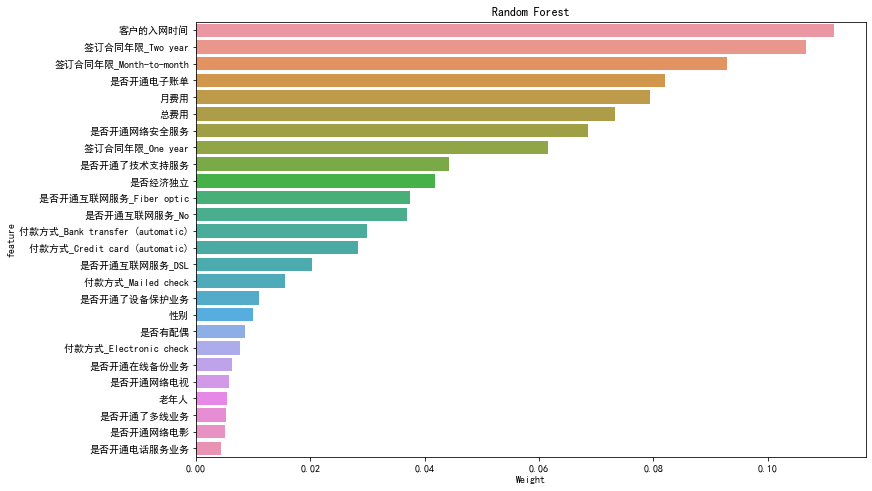

In [75]:
figuer,ax=plt.subplots(figsize=(12,8))
g=sns.barplot(0,'feature',data=fea_import)
g.set_xlabel('Weight')
g.set_title('Random Forest')

## 分析建议

针对上述分析，从业务角度给出建议：

- 根据预测模型，构建一个高流失率的用户列表。通过用户调研推出一个最小可行化产品功能，并要求种子用户进行试用。
- 用户方面：针对老年用户、无亲属无伴侣用户，制定专属的个性化服务如推出亲属套餐、温暖套餐等，提升用户的体验度。
- 服务方面：针对新注册用户，推送半年优惠比如赠送消费券，以此渡过用户的流失高峰期。针对光纤用户和附加网络电视、电影用户，重点在于提升网络体验、增值服务体验，例如对用户承诺免费网络升级服务。针对在线安全、在线备份、设备保护、技术支持等增值服务，应重点对用户进行推广介绍，如首月/半年免费体验。
- 合同方面：针对单月合同用户，建议推出半年合同付费折扣活动，将月用户转化为半年用户，提高用户的在网时长，增加用户的黏性。针对采用电子支票的用户，建议推送其他的支付方式的优惠券，引导用户改变支付方式。